In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = data['data']

In [5]:
#K-means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

In [6]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering()

In [7]:
#check K-means clustering algorithms' evaluation matrics

from sklearn import metrics
kmeans.fit(X)
#Adjusted Rand index(evaluation metrics)(unsupervised)
labels_true = data['target']
labels_pred = kmeans.labels_
print('Unsupervised Adjusted Rand Index : {}'.format(metrics.adjusted_rand_score(labels_true, labels_pred)))

#Adjusted Rand index(evaluation metrics)(supervised)
y = data['target']
kmeans.fit(X,y)
y_pred = kmeans.labels_
print('Supervised Adjusted Rand Index : {}'.format(metrics.adjusted_rand_score(y, y_pred)))

Unsupervised Adjusted Rand Index : 0.40426305267803825
Supervised Adjusted Rand Index : 0.3990503203709199


In [8]:
#check hierarchical clustering algorithms' evaluation matrics

from sklearn import metrics
hierarchical.fit(X)
#Silhouette Coefficient(evaluation metrics)(unsupervised)
labels_p = hierarchical.labels_
print('Unsupervised Silhouette Score : {}'.format(metrics.silhouette_score(X, labels_p, metric='euclidean')))

#Silhouette Coefficient(evaluation metrics)(supervised)
y = data['target']
hierarchical.fit(X,y)
y = y.reshape(-1,1)
y_p = hierarchical.labels_
print('Supervised Silhouette Score : {}'.format(metrics.silhouette_score(y, y_p, metric='euclidean')))

Unsupervised Silhouette Score : 0.6867350732769776
Supervised Silhouette Score : 0.7474747474747474


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


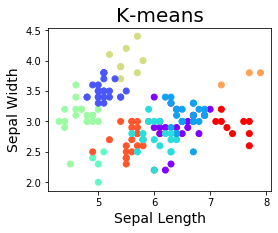

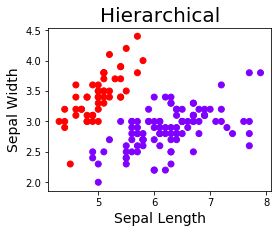

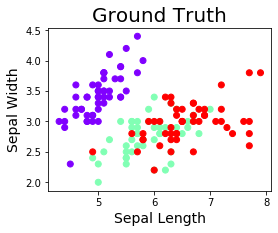

In [9]:
#Make 3 plots ~~~

estimators = [('K-means', kmeans),('Hierarchical', hierarchical)]
fignum = 1

for title, model in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = plt.subplot()
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Sepal Length', fontsize=14)
    ax.set_ylabel('Sepal Width', fontsize=14)
    fignum = fignum + 1

#Ground Truth
fig = plt.figure(3, figsize=(4,3))
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1], c=data['target'], cmap='rainbow')
ax.set_title('Ground Truth', fontsize=20)
ax.set_xlabel('Sepal Length', fontsize=14)
ax.set_ylabel('Sepal Width', fontsize=14)
fig.show()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


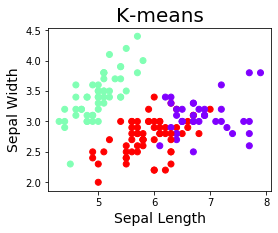

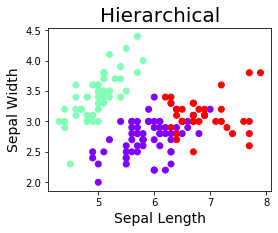

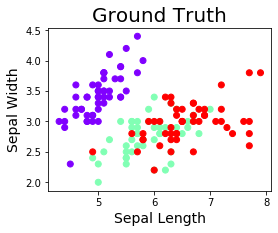

In [9]:
#Try different parameters for clustering algorithms so that their results will be as close as possible to ground truth labels.

estimators = [('K-means', KMeans(n_clusters=3)),('Hierarchical', AgglomerativeClustering(n_clusters=3))]
fignum = 1

for title, model in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = plt.subplot()
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Sepal Length', fontsize=14)
    ax.set_ylabel('Sepal Width', fontsize=14)
    fignum = fignum + 1

#Ground Truth
fig = plt.figure(3, figsize=(4,3))
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1], c=data['target'], cmap='rainbow')
ax.set_title('Ground Truth', fontsize=20)
ax.set_xlabel('Sepal Length', fontsize=14)
ax.set_ylabel('Sepal Width', fontsize=14)
fig.show()

Text(0, 0.5, 'score')

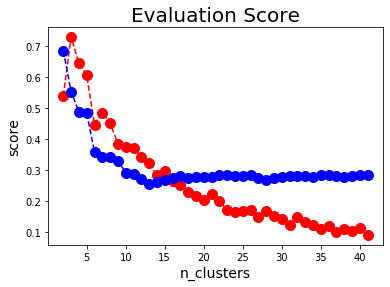

<Figure size 864x432 with 0 Axes>

In [10]:

ax = plt.subplot()

adjusted_rand_score_Km = []
silhouette_coefficient_heir = []

for i in range(2,42):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels_true = data['target']
    labels_pred = kmeans.labels_
    score = metrics.adjusted_rand_score(labels_true, labels_pred)
    adjusted_rand_score_Km.append(score)
    
    hierarchical = AgglomerativeClustering(n_clusters=i)
    hierarchical.fit(X)
    labels_p = hierarchical.labels_
    score = metrics.silhouette_score(X, labels_p)
    silhouette_coefficient_heir.append(score)
    
    
fig = plt.figure(figsize=(12, 6))
#plot K-means' ADI score
ax.plot(range(2,42), adjusted_rand_score_Km, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plot AgglomerativeClustering's ADI score
ax.plot(range(2,42), silhouette_coefficient_heir, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
ax.set_title('Evaluation Score', fontsize = 20)
ax.set_xlabel('n_clusters', fontsize = 14)
ax.set_ylabel('score', fontsize = 14)